**Last verified to run:**   2021-08-30

**Software:**
* phosim_syseng4 **v1.0.8**

* phosim_utils **v0.2.7**

Ticket https://jira.lsstcorp.org/browse/DM-31532 
    
Te-Wei notes on that subject https://confluence.lsstcorp.org/display/LTS/Closed-Loop+Simulation+with+Non-Zero+Camera+Rotation+Angle 
    
Notes on rotskypos, rottelpos https://confluence.lsstcorp.org/display/LTS/AOS+rottelpos%2C+rotskypos 

First, I've already prepared a catalog that has upright LSST letters. It's at `/project/scichris/aos/images/lsstCam/lsstCam_entire_tiled_LSST.inst` : 

In [1]:
import os
import numpy as np 
import pandas as pd
# Read the inst file 
inst_file = os.path.join('/project/scichris/aos/images/lsstCam/',
                         'lsstCam_entire_tiled_LSST.inst'
                        )
cat = np.genfromtxt(inst_file,skip_header=16)
cat_df = pd.DataFrame(cat[:, 1:5], columns=['id', 'ra', 'dec', 'g'])

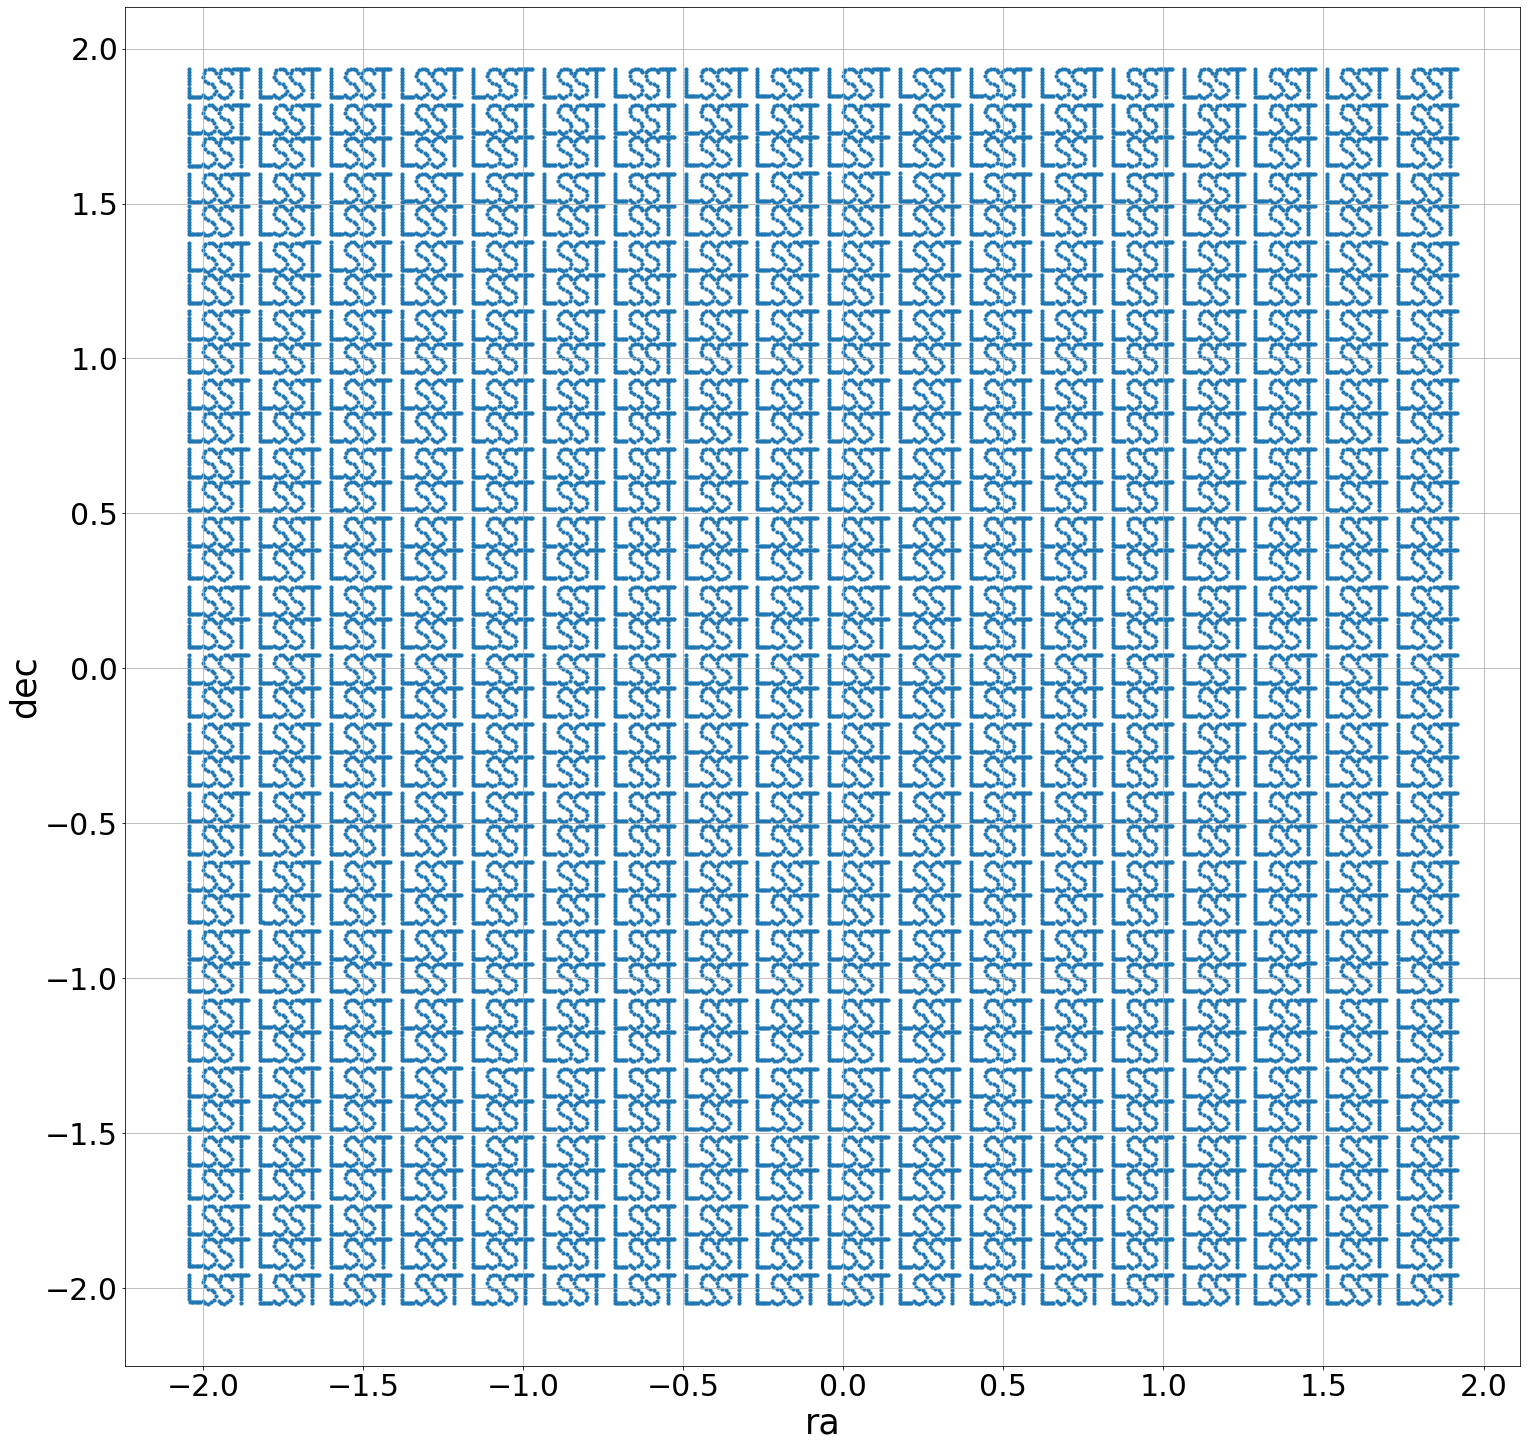

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot the star 
ra = cat_df['ra']
ra[ra>180] = ra[ra>180]-360

dec = cat_df['dec']
fig,ax = plt.subplots(1,1,figsize=(25,25))
ax.scatter(ra,dec,s=10)
plt.tick_params(axis='both', which='major', labelsize=30)
ax.set_xlabel('ra',fontsize=35)
ax.set_ylabel('dec',fontsize=35)

ax.grid()
plt.savefig("LsstCam_input_catalog_large_LSST_font.jpeg", bbox_inches='tight')

This instance catalog was made with https://github.com/suberlak/AOS/blob/main/AOS_DM-30367_summary.ipynb
 
Setup the environment:

    source "/software/lsstsw/stack/loadLSST.bash"
    setup lsst_distrib
    source /project/scichris/aos/setup_aos_current.sh




Simulate the baseline, with `rotskypos = 0 `,  `rottelpos = 0 ` commands: 


    mkdir letter_lsstCam_norot_R22_S11
    mkdir letter_lsstCam_norot_R22_S11/raw
    cd letter_lsstCam_norot_R22_S11/
    
    srun -I -t 24:00:00 --pty bash
    
    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/images/lsstCam/lsstCam_entire_tiled_LSST.inst -i lsst -e 1 -c /project/scichris/aos/images/lsstCam/noBkgnd.cmd -p 20  -s R22_S11 -o /project/scichris/aos/images/lsstCam/letter_lsstCam_norot_R22_S11/raw/ > starPhoSimLetter.log 2>&1


    phosim_repackager.py /project/scichris/aos/images/lsstCam/letter_lsstCam_norot_R22_S11/raw/ --out_dir /project/scichris/aos/images/lsstCam/letter_lsstCam_norot_R22_S11/repackaged/ --inst lsst 


    cp ../letter_R22/runIsr.sh .
    cp ../letter_R22/testPipeline.yaml .

    ./runIsr.sh      
    
Content of the logfile

    [rottelpos] Rotator Angle (degrees)                        0.000000
    [rotskypos] Parallactic - Rotator Angle (degrees)          0.000000
    
    

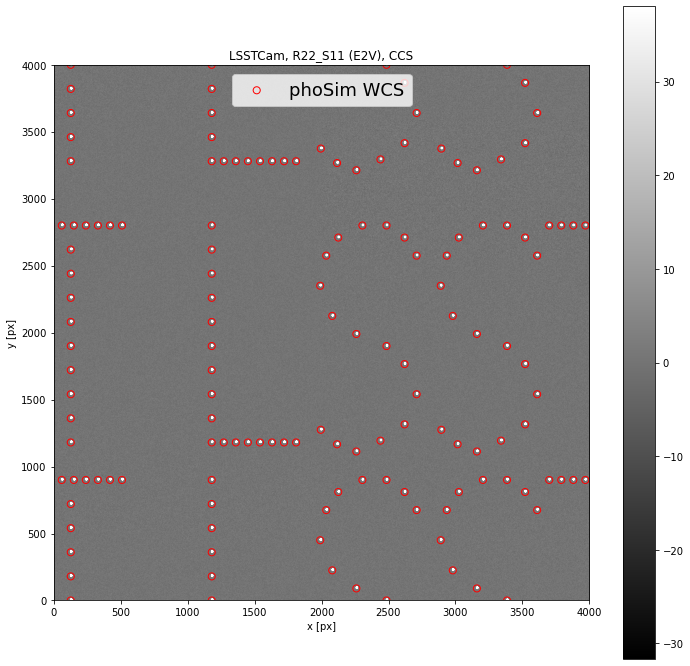

In [8]:
# here is the outcome with 
# rotskypos 0
# rottelpos 0 
import run_ps1_functions as func
func.plot_butler_with_wcs('/project/scichris/aos/images/lsstCam/letter_lsstCam_norot_R22_S11/DATA',
                         detector='R22_S11',
                         coords='CCS')


If we simulate just R22, and do 

    rotSkyPos  0 
    rotTelPos  30

    cd /project/scichris/aos/images/lsstCam/
    cp lsstCam_entire_tiled_LSST.inst lsstCam_entire_tiled_LSST_rottelpos_30.inst 
    nano lsstCam_entire_tiled_LSST_rottelpos_30.inst # change rottelpos to 30 
    
    mkdir letter_lsstCam_rottelpos_R22_S11/
    mkdir letter_lsstCam_rottelpos_R22_S11/raw
    cd letter_lsstCam_rottelpos_R22_S11/
    
Get a worker node:

https://lsstc.slack.com/archives/C2K6D7R61/p1629244017064200?thread_ts=1629238795.057700&cid=C2K6D7R61   
    
    srun -I -t 24:00:00 --pty bash
execute the following: 

    
    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/images/lsstCam/lsstCam_entire_tiled_LSST_rottelpos_30.inst -i lsst -e 1 -c /project/scichris/aos/images/lsstCam/noBkgnd.cmd -p 20  -s R22_S11 -o /project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11/raw/ > starPhoSimLetter.log 2>&1


    phosim_repackager.py /project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11/raw/ --out_dir /project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11/repackaged/ --inst lsst 


    cp ../letter_R22/runIsr.sh .
    cp ../letter_R22/testPipeline.yaml .

    ./runIsr.sh               



( note:  having 

    rotskypos 0
    rottelpos 30 
results in not-rotated image. 

Removing `rotskypos 0`  and keeping `rottelpos 30` produces the rotated image as below)

In [6]:
func.plot_butler_with_wcs??

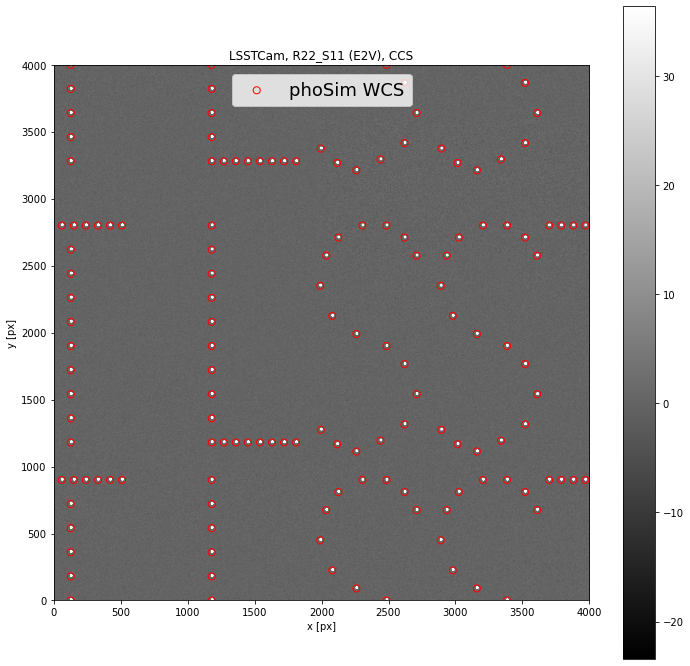

In [2]:
# this is with standard repackaging as above 
import run_ps1_functions as func
func.plot_butler_with_wcs('/project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11/DATA',
                         detector='R22_S11',
                         coords='CCS')

?? With `rotskypos 0 ` and `rottelpos 30` we don't see any change ? Weird... 

Change order:
    
    instead of what's in  lsstCam_entire_tiled_LSST_rottelpos_30.inst 
    
    rotskypos 0
    rottelpos 30
    
do 
    
    rottelpos 30
    rotskypos 0
    
( saved as  lsstCam_entire_tiled_LSST_rottelpos_30_2.inst )

    mkdir letter_lsstCam_rottelpos_R22_S11
    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/images/lsstCam/lsstCam_entire_tiled_LSST_rottelpos_30_2.inst -i lsst -e 1 -c /project/scichris/aos/images/lsstCam/noBkgnd.cmd -p 20  -s R22_S11 -o /project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11_2/raw/ > starPhoSimLetter.log 2>&1


    phosim_repackager.py /project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11_2/raw/ --out_dir /project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11_2/repackaged/ --inst lsst 
    
    cp ../letter_R22/runIsr.sh .
    cp ../letter_R22/testPipeline.yaml .

    ./runIsr.sh      
    
    
the log has correctly set 

    [rottelpos] Rotator Angle (degrees)                        30.000000
    [rotskypos] Parallactic - Rotator Angle (degrees)          0.000000

but the image does not rotate - it seems that the two parameters fight each other...


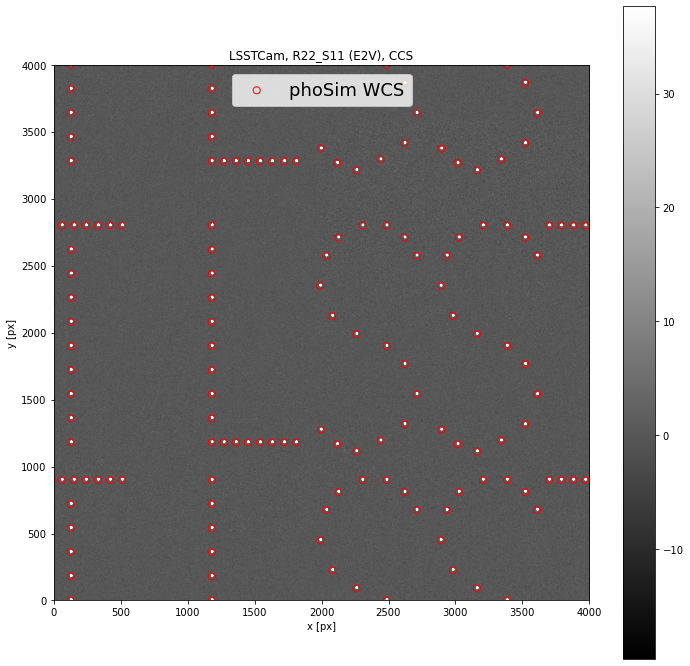

In [3]:

func.plot_butler_with_wcs('/project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11_2/DATA',
                         detector='R22_S11',
                         coords='CCS')

Try setting just rottelpos 30 , and not have rotskypos :
    
    
    mkdir letter_lsstCam_rottelpos_R22_S11_3
    
    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/images/lsstCam/lsstCam_entire_tiled_LSST_rottelpos_30_3.inst -i lsst -e 1 -c /project/scichris/aos/images/lsstCam/noBkgnd.cmd -p 20  -s R22_S11 -o /project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11_3/raw/ > starPhoSimLetter.log 2>&1


    phosim_repackager.py /project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11_3/raw/ --out_dir /project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11_3/repackaged/ --inst lsst 
    
    cp ../letter_R22/runIsr.sh .
    cp ../letter_R22/testPipeline.yaml .

    ./runIsr.sh      
    

The log has 

    [rottelpos] Rotator Angle (degrees)                        30.000000
    [rotskypos] Parallactic - Rotator Angle (degrees)          -151.612936
  
so if we don't set `rotskypos`,  it appears to be set at random.

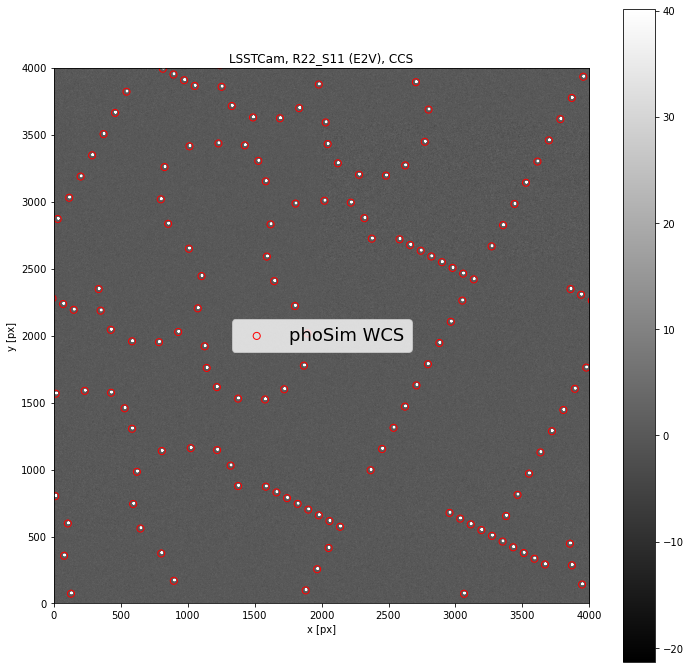

In [4]:
func.plot_butler_with_wcs('/project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11_3/DATA',
                         detector='R22_S11',
                         coords='CCS')



In [ ]:
?? There is a rotation, but why so much ? 

this is with `--no-derotate `

    phosim_repackager.py /project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11/raw/ --out_dir /project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11/repackaged2/ --inst lsst 
    
    
    

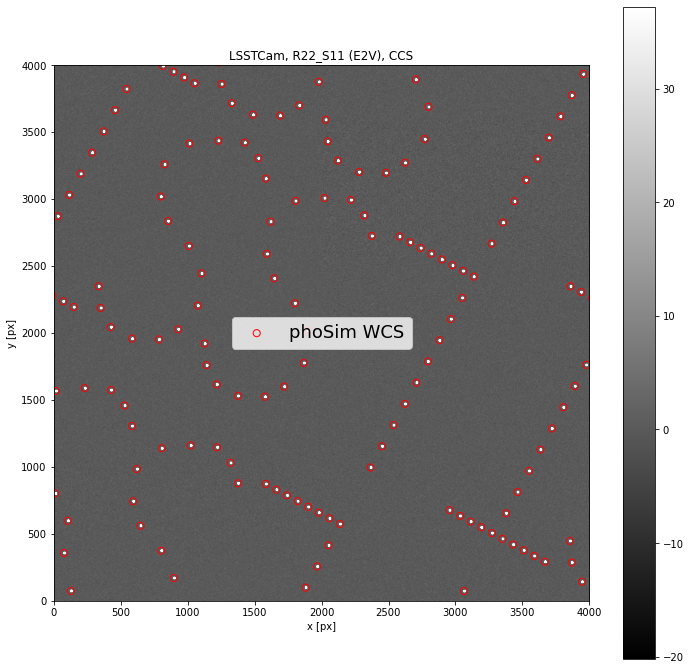

In [2]:
func.plot_butler_with_wcs('/project/scichris/aos/images/lsstCam/letter_lsstCam_rottelpos_R22_S11/DATA2',
                         detector='R22_S11',
                         coords='CCS')

?? Why it doesn't do anything? 

Try `rotskypos = 30`, `rottelpos = 0 `  : 
    
    cp lsstCam_entire_tiled_LSST.inst lsstCam_entire_tiled_LSST_rotskypos_30.inst 
    nano lsstCam_entire_tiled_LSST_rotskypos_30.inst  # change rotskypos to 30 
    
    
    mkdir letter_lsstCam_rotskypos_R22_S11/
    mkdir letter_lsstCam_rotskypos_R22_S11/raw
    cd letter_lsstCam_rotskypos_R22_S11/
    
    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/images/lsstCam/lsstCam_entire_tiled_LSST_rotskypos_30.inst -i lsst -e 1 -c /project/scichris/aos/images/lsstCam/noBkgnd.cmd -p 20  -s R22_S11 -o /project/scichris/aos/images/lsstCam/letter_lsstCam_rotskypos_R22_S11/raw/ > starPhoSimLetter.log 2>&1


    phosim_repackager.py /project/scichris/aos/images/lsstCam/letter_lsstCam_rotskypos_R22_S11/raw/ --out_dir /project/scichris/aos/images/lsstCam/letter_lsstCam_rotskypos_R22_S11/repackaged/ --inst lsst 


    cp ../letter_R22/runIsr.sh .
    cp ../letter_R22/testPipeline.yaml .

    ./runIsr.sh               


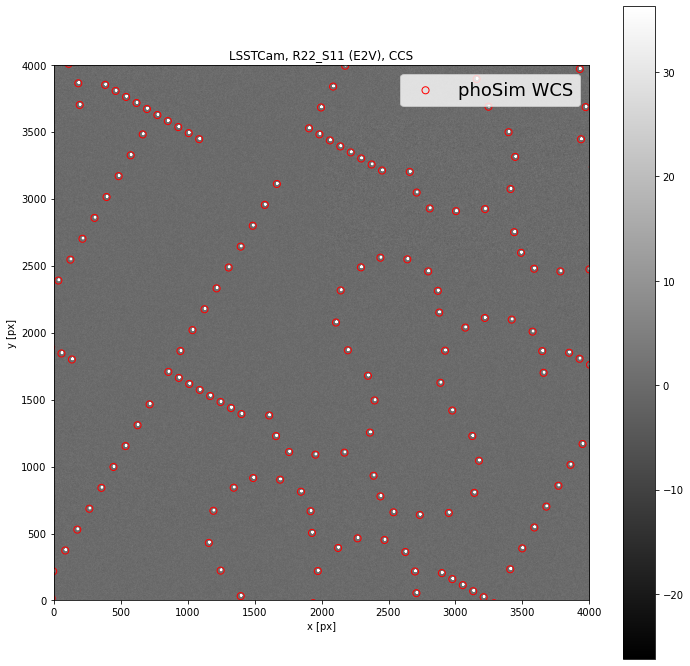

In [8]:
func.plot_butler_with_wcs('/project/scichris/aos/images/lsstCam/letter_lsstCam_rotskypos_R22_S11/DATA',
                         detector='R22_S11',
                         coords='CCS')

Try only `rotskypos 30`,  and no rottelpos :
    
    cp lsstCam_entire_tiled_LSST_rotskypos_30.inst  lsstCam_entire_tiled_LSST_rotskypos_30_2.inst  # remove rottelpos 
    
    
    mkdir letter_lsstCam_rotskypos_R22_S11_2/
    mkdir letter_lsstCam_rotskypos_R22_S11_2/raw
    cd letter_lsstCam_rotskypos_R22_S11_2/
    
    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/images/lsstCam/lsstCam_entire_tiled_LSST_rotskypos_30_2.inst -i lsst -e 1 -c /project/scichris/aos/images/lsstCam/noBkgnd.cmd -p 20  -s R22_S11 -o /project/scichris/aos/images/lsstCam/letter_lsstCam_rotskypos_R22_S11_2/raw/ > starPhoSimLetter.log 2>&1


    phosim_repackager.py /project/scichris/aos/images/lsstCam/letter_lsstCam_rotskypos_R22_S11_2/raw/ --out_dir /project/scichris/aos/images/lsstCam/letter_lsstCam_rotskypos_R22_S11_2/repackaged/ --inst lsst 


    cp ../letter_R22/runIsr.sh .
    cp ../letter_R22/testPipeline.yaml .

    ./runIsr.sh   
    
The log contains random rottelpos and set rotskypos 

    [rottelpos] Rotator Angle (degrees)                        -151.612936
    [rotskypos] Parallactic - Rotator Angle (degrees)          30.000000
    

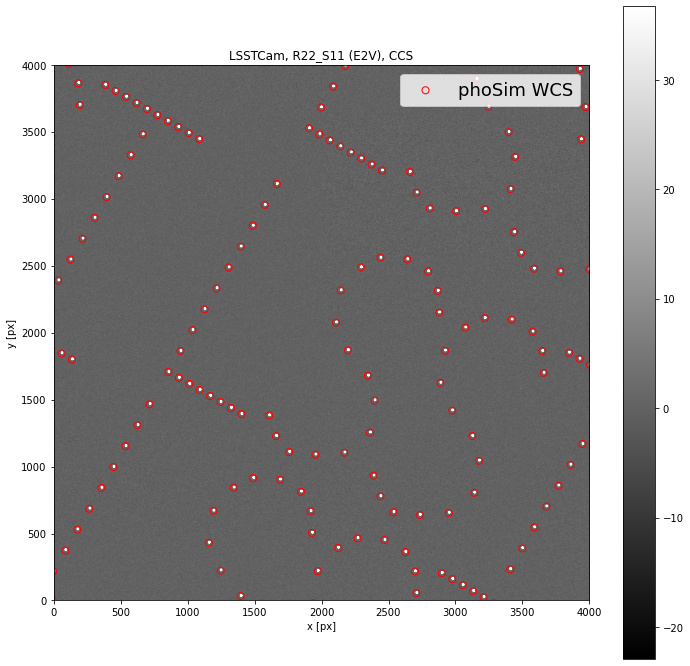

In [6]:
func.plot_butler_with_wcs('/project/scichris/aos/images/lsstCam/letter_lsstCam_rotskypos_R22_S11_2/DATA',
                         detector='R22_S11',
                         coords='CCS')

In [2]:
import palpy

In [3]:
from lsst.sims.utils import _icrsFromObserved, _observedFromICRS, calcLmstLast

ModuleNotFoundError: No module named 'lsst.sims'

In [4]:
import numpy as np

In [6]:
longitude_rad = np.deg2rad(289.1941)
longitude_rad

5.047389222341733

In [7]:



def calcGmstGast(mjd):
    '''
    Compute Greenwich mean sidereal time and Greenwich apparent sidereal time
    see: From http://aa.usno.navy.mil/faq/docs/GAST.php
    
    mjd is the universal time (UT1) expressed as an MJD
    gmst Greenwich mean sidereal time in hours
    
    gast Greenwich apparent sidereal time in hours
    '''
    
    date = np.floor(mjd)
    ut1 = mjd - date
    gmst = palpy.gmsta(date, ut1)
    
    #  The equation of equinoxes. See http://aa.usno.navy.mil/faq/docs/GAST.php
    eqeq = palpy.eqeqx(mjd) # in radians 
    
    gast = gmst + eqeq

    gmst = gmst * 24.0 / (2.0 * np.pi)
    gmst %= 24.0

    gast = gast * 24.0 / (2.0 * np.pi)
    gast %= 24.0

    return gmst, gast
        

def calcLmstLast(mjd,longRad):
    '''
    calculates local mean sidereal time and local apparent sidereal time
     
    longRad is the longitude in radians (positive east of the prime meridian)
    mjd is the universal time (UT1) expressed as an MJD.
    '''
    longDeg0 = np.degrees(longRad)
    longDeg0 %= 360.0
    if longDeg0 > 180.:
        longDeg = longDeg0 - 360.
    else:
        longDeg = longDeg0
        
    hrs = longDeg / 15.0
    gmstgast = calcGmstGast(mjd)
    lmst = gmstgast[0] + hrs
    last = gmstgast[1] + hrs
    lmst %= 24.
    last %= 24.
    return lmst, last


In [9]:

raObs, decObs = 0,0 # _observedFromICRS(raRad, decRad, obs_metadata=obs,
                #  epoch=2000.0, includeRefraction=includeRefraction)


mjd = 57648     
lst = calcLmstLast(mjd,longitude_rad)
#last = lst[1]


In [12]:
last = lst[1]
haRad = np.radians(last * 15.0) - raObs
print(haRad)
print(raObs)

4.983823310012042
0


In [13]:
latitude_rad = np.deg2rad(-30.00228)

az, azd, azdd, \
        alt, altd, altdd, \
        pa, pad, padd = palpy.altaz(haRad, decObs, latitude_rad)

In [17]:
paRad  = pa 

In [24]:
# def1 : paRad - rotTelRad
rotTelRad = np.deg2rad(30)
rotSkyPos1 = (paRad - rotTelRad) % (2. * np.pi)
print(np.rad2deg(rotSkyPos1))

# def2 : rotTelRad - paRad
rotSkyPos2 = (rotTelRad - paRad ) % (2. * np.pi)
print(np.rad2deg(rotSkyPos2))

209.06376066665896
150.93623933334104


In [25]:
360-151.612936


208.387064